# **2025 - Homework - Regression**

## Part 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
print(f"Pandas: {pd.__version__}\nNumpy: {np.__version__}\nMatplotlib: {matplotlib.__version__}\nSeaborn: {sns.__version__}")

Pandas: 2.3.1
Numpy: 2.3.1
Matplotlib: 3.10.3
Seaborn: 0.13.2


In [4]:
# Import the dataset
df = pd.read_csv("car_fuel_efficiency.csv")

columns = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]
df = df[columns]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [5]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

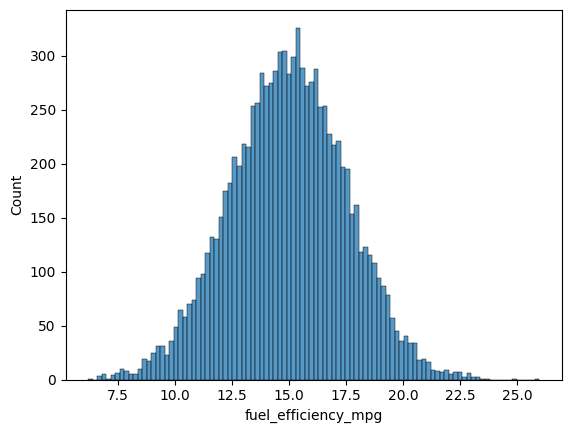

In [6]:
sns.histplot(df.fuel_efficiency_mpg, bins=100)

### EDA. Does fuel_efficiency_mpg have a long tail?

The data appears to be close to a normal distribution and does not have a long tail

In [7]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 1. Null Values
Only the Horsepower column has null values

In [8]:
df.horsepower.median()

np.float64(149.0)

### Question 2. Median
The median value of Horsepower is 149

In [9]:
n = df.shape[0]
n_val = (int)(n * 0.2)
n_test = (int)(n * 0.2)
n_train = n - n_val - n_test

n_train, n_val, n_test, n_train + n_val + n_test

(5824, 1940, 1940, 9704)

In [10]:
indexes = np.arange(n)
np.random.seed(42)   # seed needs to be in the same block as the shuffle, otherwise the seed gets lost after the first shuffle
np.random.shuffle(indexes)
indexes

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [11]:
df_train = df.iloc[indexes[:n_train]]
df_val = df.iloc[indexes[n_train : n_train + n_val]]
df_test = df.iloc[indexes[n_train + n_val : ]]

y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg

del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]

In [12]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006


In [13]:
horsepower_mean = df_train["horsepower"].mean()
horsepower_mean

np.float64(149.54476367006487)

In [14]:
X_train_zeros = df_train.copy().fillna(0)
X_train_zeros.describe()

,engine_displacement,horsepower,vehicle_weight,model_year
count,5824.000000,5824.000000,5824.000000,5824.000000
mean,199.429945,138.529190,3006.672919,2011.444712
std,49.543177,48.357282,497.856998,6.669193
min,10.000000,0.000000,952.681761,2000.000000
25%,170.000000,123.000000,2669.313374,2006.000000
50%,200.000000,146.000000,2993.348283,2011.000000
75%,230.000000,168.000000,3342.151520,2017.000000
max,380.000000,246.000000,4610.973229,2023.000000


In [15]:
X_train_mean = df_train.copy().fillna(horsepower_mean)
X_train_mean.describe()

,engine_displacement,horsepower,vehicle_weight,model_year
count,5824.000000,5824.000000,5824.000000,5824.000000
mean,199.429945,149.544764,3006.672919,2011.444712
std,49.543177,28.498880,497.856998,6.669193
min,10.000000,46.000000,952.681761,2000.000000
25%,170.000000,131.000000,2669.313374,2006.000000
50%,200.000000,149.544764,2993.348283,2011.000000
75%,230.000000,168.000000,3342.151520,2017.000000
max,380.000000,246.000000,4610.973229,2023.000000


$w = (X^TX)^{-1}X^Ty$

In [16]:
# Taken from lecture notes
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [17]:
w0, w = train_linear_regression(X_train_zeros, y_train)

w0, w

(np.float64(28.82736547365895),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04]))

In [18]:
y_pred_zeros = w0 + df_val.dot(w)
y_pred_zeros

6163    16.037338
3313    14.925222
4781    11.864459
8210    16.118236
6713     9.452563
          ...    
7802    13.212633
6780    16.300389
7541    13.695609
1577    13.625751
3906    16.449368
Length: 1940, dtype: float64

In [19]:
# Taken from lecture notes
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [20]:
error_zeros = rmse(y_val, y_pred_zeros)
error_zeros

np.float64(0.4968600686648501)

In [21]:
w0, w = train_linear_regression(X_train_mean, y_train)
w0, w

(np.float64(28.925259951002698),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [22]:
y_pred_mean = w0 + df_val.dot(w)
y_pred_mean

6163    15.738375
3313    14.803383
4781    12.036249
8210    15.772093
6713     9.924856
          ...    
7802    13.547392
6780    16.325909
7541    14.014826
1577    13.721614
3906    16.193629
Length: 1940, dtype: float64

In [23]:
error_mean = rmse(y_val, y_pred_mean)
error_mean

np.float64(0.45364429177056464)

In [24]:
print(f"Filling nulls with zeros: {round(error_zeros*100,1)}%")
print(f"Filling nulls with mean: {round(error_mean*100,1)}%")
print(f"Difference: {round(np.abs(error_zeros - error_mean) * 100, 1)}%")

Filling nulls with zeros: 49.7%
Filling nulls with mean: 45.4%
Difference: 4.3%


### Question 3. Filling nulls with zeros or the mean? 
Filling the null values with the mean value gave an error rate roughly 4.3% lower than filling the null values with 0

In [25]:
# Taken from lecture notes
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [32]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
errors = []
min_error = 1000
min_r = None

for r in r_values:
    w0, w = train_linear_regression_reg(X_train_zeros, y_train, r)

    y_pred = w0 + df_val.dot(w)
    error = rmse(y_val, y_pred)
    errors.append(error)

    if error < min_error:
        min_error = error
        min_r = r
min_r, min_error

(0.01, np.float64(0.49659290515819066))

### Question 4. Best RMSE from r values
We get the lowest RMSE from r=0.01

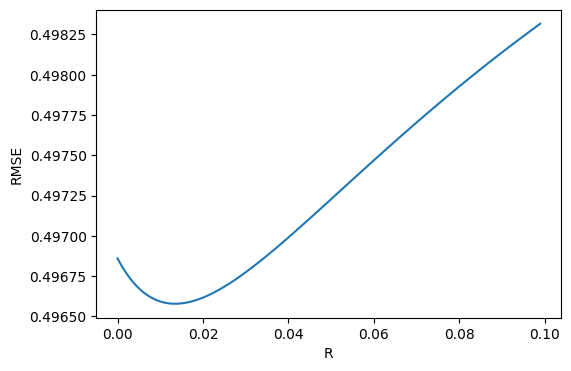

In [48]:


plt.figure(figsize=(6, 4))
plt.ylabel('RMSE')
plt.xlabel('R')
sns.lineplot(x=r_values, y=errors)

plt.show()


In [47]:
r_values = [i/1000 for i in range(0, 100,1)]
errors = []
min_error = 1000
min_r = None
for r in r_values:
    w0, w = train_linear_regression_reg(X_train_zeros, y_train, r)

    y_pred = w0 + df_val.dot(w)

    error = rmse(y_val, y_pred)
    errors.append(error)

    if error < min_error:
        min_error = error
        min_r = r
min_r, min_error

(0.013, np.float64(0.4965791100349331))

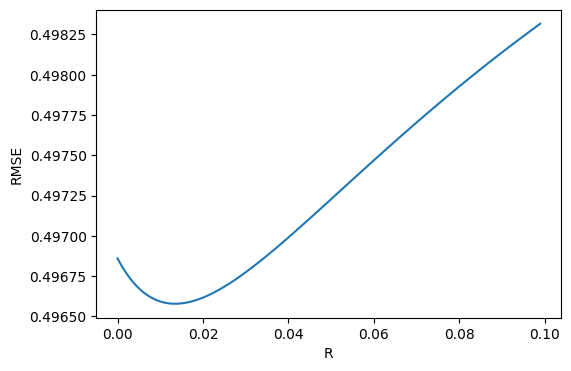

In [49]:
plt.figure(figsize=(6, 4))
plt.ylabel('RMSE')
plt.xlabel('R')
sns.lineplot(x=r_values, y=errors)
plt.show()

We can inspect the values even closer and find a better r value of 0.013

In [114]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

results = []

for s in seeds:
    n = df.shape[0]
    n_val = (int)(n * 0.2)
    n_test = (int)(n * 0.2)
    n_train = n - n_val - n_test
    
    n_train, n_val, n_test, n_train + n_val + n_test

    indexes = np.arange(n)
    np.random.seed(s)   # seed needs to be in the same block as the shuffle, otherwise the seed gets lost after the first shuffle
    np.random.shuffle(indexes)
    indexes

    df_train = df.iloc[indexes[:n_train]]
    df_val = df.iloc[indexes[n_train : n_train + n_val]]
    df_test = df.iloc[indexes[n_train + n_val : ]]
    
    y_train = df_train.fuel_efficiency_mpg
    y_val = df_val.fuel_efficiency_mpg
    y_test = df_test.fuel_efficiency_mpg
    
    del df_train["fuel_efficiency_mpg"]
    del df_val["fuel_efficiency_mpg"]
    del df_test["fuel_efficiency_mpg"]

    fill_values = [0]
    r_values = [0]
    
    for f in fill_values:

        for r in r_values:
            X_train = df_train.copy().fillna(f)
            w0, w = train_linear_regression_reg(X_train, y_train, r)
    
            y_pred = w0 + df_val.dot(w)

            error = rmse(y_val, y_pred)

            results.append(
                {
                    "seed" : s,
                    "fill_value" : f,
                    "r_value" : r,
                    "error" : error
                }
            )

In [115]:
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="error")
df_results

,seed,fill_value,r_value,error
8,8,0,0,0.484337
3,3,0,0,0.489915
7,7,0,0,0.491651
4,4,0,0,0.491670
9,9,0,0,0.496411
5,5,0,0,0.497849
2,2,0,0,0.498352
0,0,0,0,0.498889
1,1,0,0,0.501115
6,6,0,0,0.506507


In [116]:
std = np.std(df_results["error"])
round(std, 5)

np.float64(0.00603)

### Question 5. Result of changing seed
The standard deviation in error when changing the seed is roughly 0.006. This means that using a different seed has a fairly small effect on changing the outcome

In [104]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

results = []

for s in seeds:
    n = df.shape[0]
    split_values = [0.05, 0.1, 0.2, 0.3]
    for split in split_values:
        n_val = (int)(n * split)
        n_test = (int)(n * split)
        n_train = n - n_val - n_test
        
        n_train, n_val, n_test, n_train + n_val + n_test
    
        indexes = np.arange(n)
        np.random.seed(s)   # seed needs to be in the same block as the shuffle, otherwise the seed gets lost after the first shuffle
        np.random.shuffle(indexes)
        indexes
    
        df_train = df.iloc[indexes[:n_train]]
        df_val = df.iloc[indexes[n_train : n_train + n_val]]
        df_test = df.iloc[indexes[n_train + n_val : ]]
        
        y_train = df_train.fuel_efficiency_mpg
        y_val = df_val.fuel_efficiency_mpg
        y_test = df_test.fuel_efficiency_mpg
        
        del df_train["fuel_efficiency_mpg"]
        del df_val["fuel_efficiency_mpg"]
        del df_test["fuel_efficiency_mpg"]
    
        fill_values = [0, df_train["horsepower"].mean(), df_train["horsepower"].median()]
        r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
        
        for f in fill_values:
    
            for r in r_values:
                X_train = df_train.copy().fillna(f)
                w0, w = train_linear_regression_reg(X_train, y_train, r)
        
                y_pred = w0 + df_val.fillna(f).dot(w)
    
                error = rmse(y_val, y_pred)
    
                results.append(
                    {
                        "seed" : s,
                        "fill_value" : f,
                        "r_value" : r,
                        "split"   : split,
                        "error" : error
                    }
                )

In [109]:
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="error")
df_results.describe()

,seed,fill_value,r_value,split,error
count,840.000000,840.000000,840.000000,840.000000,840.000000
mean,4.500000,99.704795,16.587143,0.162500,0.486184
std,2.873993,70.544741,34.246690,0.096072,0.028936
min,0.000000,0.000000,0.000000,0.050000,0.428911
25%,2.000000,0.000000,0.010000,0.087500,0.465674
50%,4.500000,149.000000,1.000000,0.150000,0.475762
75%,7.000000,149.787124,10.000000,0.225000,0.516009
max,9.000000,150.190304,100.000000,0.300000,0.550575


We get the lowest RMSE when we use seed=9, mean fill value, r-0.01, and Train/Val/Split=90%/5%/5%

In [103]:
seed = 9

n_val = (int)(n * 0.2)
n_test = (int)(n * 0.2)
n_train = n - n_val - n_test

indexes = np.arange(n)
np.random.seed(seed)   # seed needs to be in the same block as the shuffle, otherwise the seed gets lost after the first shuffle
np.random.shuffle(indexes)

df_train = df.iloc[indexes[:n_train]]
df_val = df.iloc[indexes[n_train : n_train + n_val]]
df_test = df.iloc[indexes[n_train + n_val : ]]

y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg

del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]

X_train = pd.concat([df_train, df_val]).fillna(0)
y_train = pd.concat([y_train, y_val])

r = 0.001
w0, w = train_linear_regression_reg(X_train, y_train, r)

y_pred = w0 + df_test.fillna(0).dot(w)

error = rmse(y_test, y_pred)
round(error, 3)

np.float64(0.516)

### Question 6. 
We find a RMSE of 0.515